<a href="https://colab.research.google.com/github/maryam98712333333333/mining-1/blob/main/mining%2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [15]:
dataTrain = pd.read_csv('cleaned_all_phones.csv')
dataTrain.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),Price
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200.0,Li-Po,2.0,2016-09-01,140.0,16.0,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700.0,Li-Ion,2.0,2016-12-01,140.0,16.0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000.0,Li-Ion,4.0,2017-01-01,147.0,16.0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100.0,Li-Po,4.0,2017-01-01,165.0,32.0,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200.0,Li-Ion,4.0,2017-02-01,145.0,32.0,420.0


In [16]:
type(dataTrain)

pandas.core.frame.DataFrame

In [17]:
dataTrain.shape

(1512, 12)

In [18]:
dataTrain.isnull().sum()

phone_name           454
brand                454
os                   454
inches               454
resolution           454
battery              454
battery_type         454
ram(GB)              454
announcement_date    454
weight(g)            454
storage(GB)          454
Price                454
dtype: int64

In [19]:

dataTrain = dataTrain.dropna()

In [20]:
dataTrain.isnull().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
Price                0
dtype: int64

In [21]:
dataTrain.shape

(1058, 12)

In [22]:
dataTrain.dtypes

phone_name            object
brand                 object
os                    object
inches               float64
resolution            object
battery              float64
battery_type          object
ram(GB)              float64
announcement_date     object
weight(g)            float64
storage(GB)          float64
Price                float64
dtype: object

In [23]:
plt.figure(figsize=(10,6))
corr = dataTrain.corr()

<Figure size 1000x600 with 0 Axes>

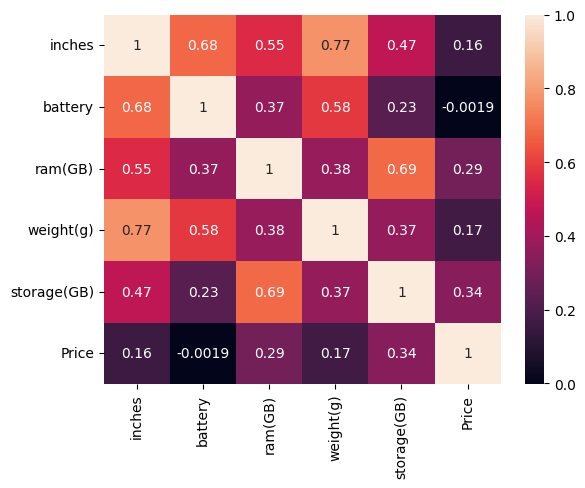

In [24]:
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
dataTrain.describe()

,inches,battery,ram(GB),weight(g),storage(GB),Price
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,6.323847,4170.247637,6.126654,184.754253,94.094518,326.081263
std,0.504464,798.146233,2.396195,27.597220,68.158190,257.195735
min,3.800000,1821.000000,1.000000,130.000000,8.000000,40.000000
25%,6.200000,3600.000000,4.000000,170.000000,64.000000,170.000000
50%,6.440000,4100.000000,6.000000,184.000000,64.000000,250.000000
75%,6.560000,5000.000000,8.000000,196.000000,128.000000,395.835000
max,10.400000,7250.000000,18.000000,500.000000,512.000000,2300.000000


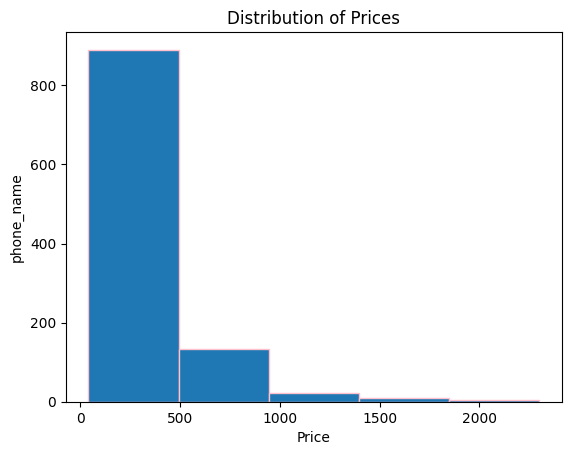

In [26]:
dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='Pink')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('phone_name')
plt.title('Distribution of Prices')
plt.show()

In [27]:
dataTrain.describe(include = 'object')

,phone_name,brand,os,resolution,battery_type,announcement_date
count,1058,1058,1058,1058,1058,1058
unique,1050,13,26,65,2,433
top,8 Pro,Xiaomi,Android 10,1080x2400,Li-Po,2018-05-01
freq,2,177,317,296,806,20


<Axes: xlabel='inches', ylabel='Price'>

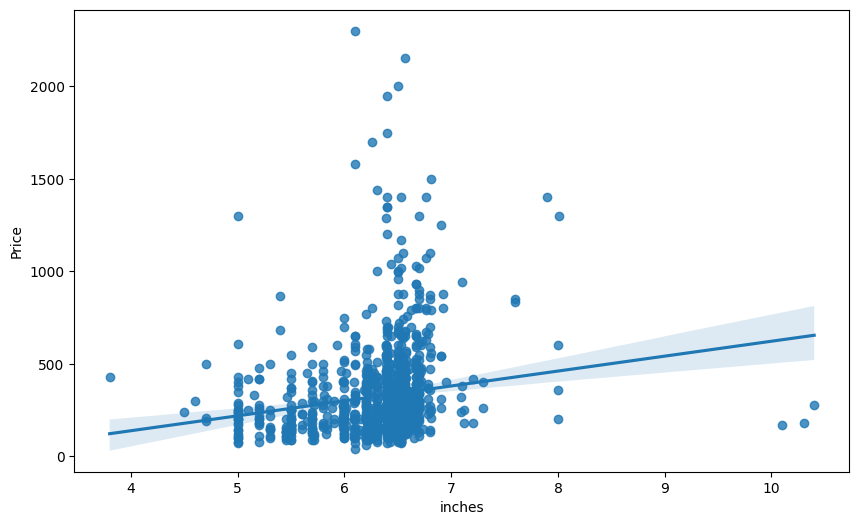

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(x="inches", y="Price", data=dataTrain)

In [34]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['inches'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.15806069108158993  with a P-value of P = 2.3703568460434673e-07


<Axes: xlabel='battery', ylabel='Price'>

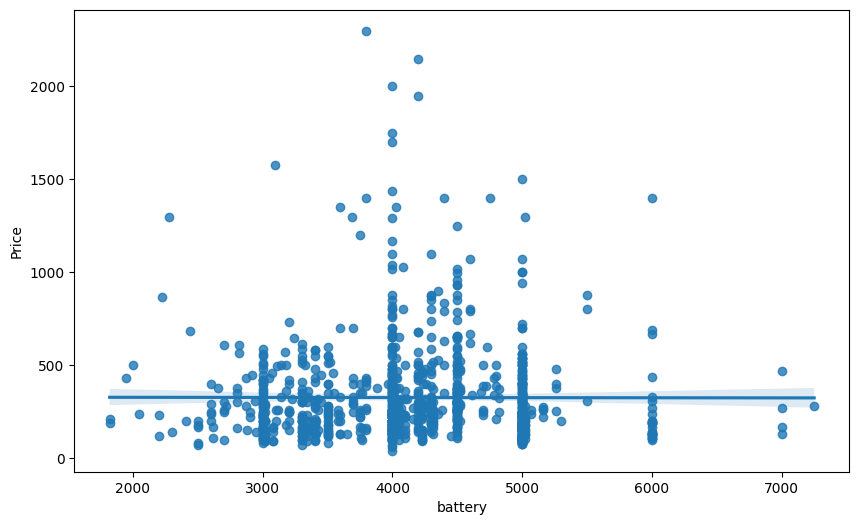

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(x="battery", y="Price", data=dataTrain)

In [38]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['battery'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0018916584062733577  with a P-value of P = 0.9509951583787791


<Axes: xlabel='ram(GB)', ylabel='Price'>

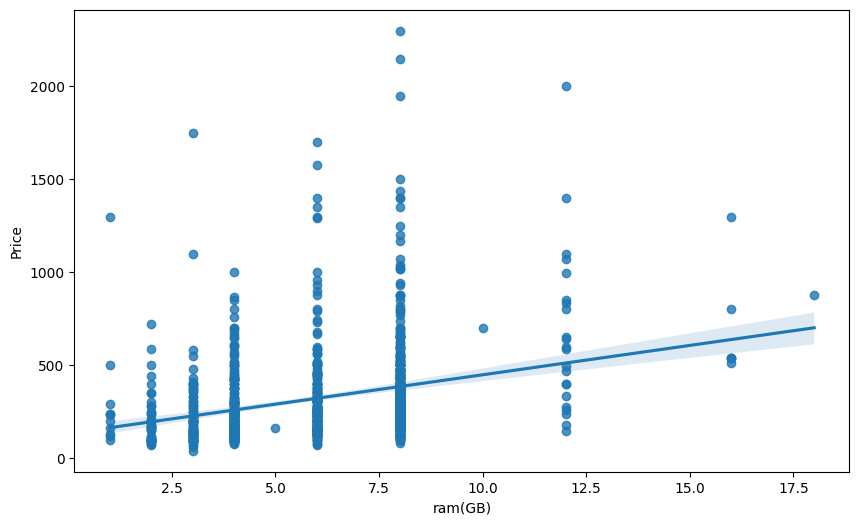

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x="ram(GB)", y="Price", data=dataTrain)

In [40]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['ram(GB)'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29462756561033593  with a P-value of P = 1.2415262750192136e-22


<Axes: xlabel='storage(GB)', ylabel='Price'>

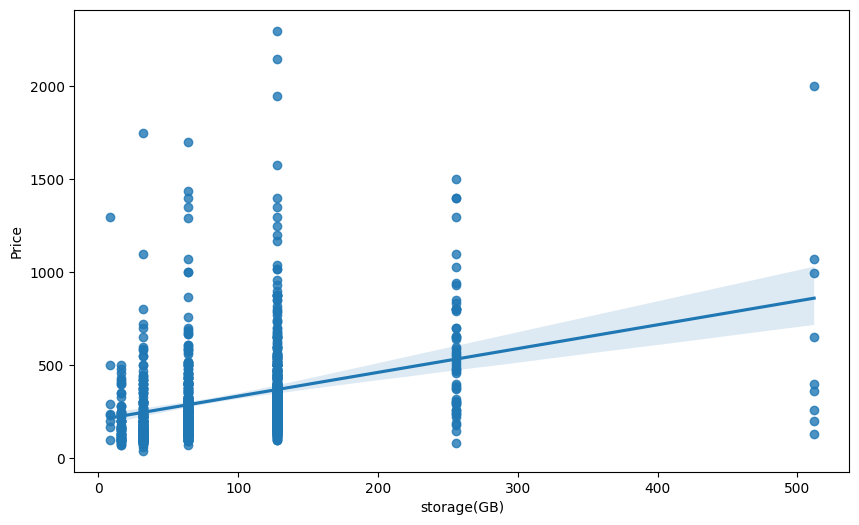

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(x="storage(GB)", y="Price", data=dataTrain)

In [42]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['storage(GB)'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3392126289089267  with a P-value of P = 6.692407119954804e-30


<Axes: xlabel='battery', ylabel='Price'>

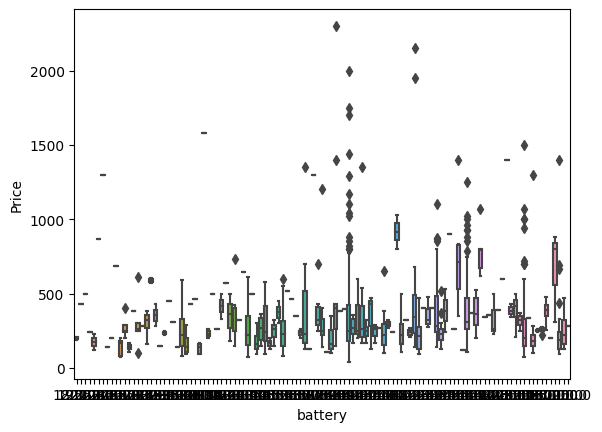

In [43]:
sns.boxplot(x="battery", y="Price", data= dataTrain)

<Axes: xlabel='ram(GB)', ylabel='Price'>

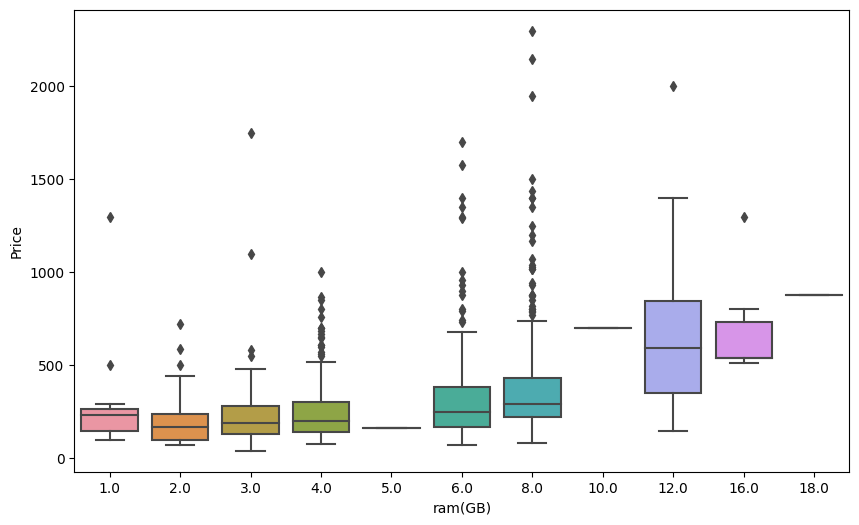

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ram(GB)", y="Price", data=dataTrain)

<Axes: xlabel='weight(g)', ylabel='Price'>

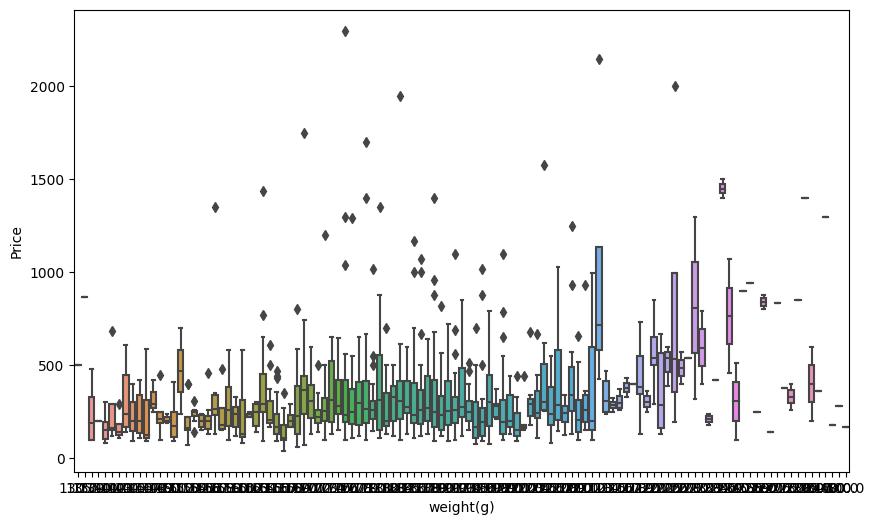

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x="weight(g)", y="Price", data=dataTrain)

<Axes: xlabel='storage(GB)', ylabel='Price'>

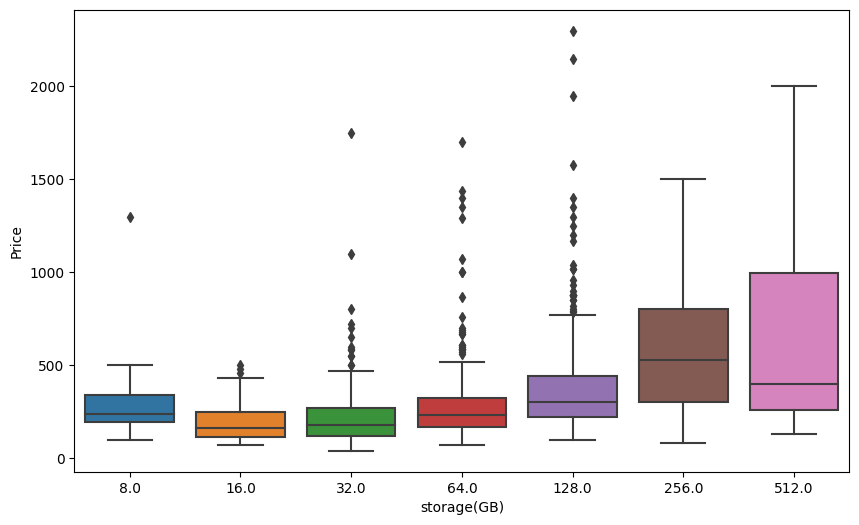

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x="storage(GB)", y="Price", data=dataTrain)

In [49]:
dataTrain.drop(['phone_name',	'brand',	'os', 'resolution',	'battery_type',	'announcement_date'], axis = 1, inplace = True)

In [50]:

dataTrain.shape


(1058, 6)

In [53]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.inches = labelencoder.fit_transform(dataTrain.inches)
dataTrain.battery = labelencoder.fit_transform(dataTrain.battery)


In [54]:
dataTrain.head(10)

,inches,battery,ram(GB),weight(g),storage(GB),Price
0,4,4,2.0,140.0,16.0,120.0
1,8,14,2.0,140.0,16.0,100.0
2,7,24,4.0,147.0,16.0,420.0
3,12,74,4.0,165.0,32.0,150.0
4,5,36,4.0,145.0,32.0,420.0
5,4,7,3.0,143.0,32.0,140.0
6,7,24,4.0,146.0,32.0,420.0
7,12,56,6.0,165.0,64.0,170.0
8,26,14,4.0,188.0,32.0,250.0
9,12,89,2.0,164.0,16.0,170.0


In [55]:
import scipy.stats as stats
dataTrain= stats.zscore(dataTrain)

In [56]:
dataTrain

,inches,battery,ram(GB),weight(g),storage(GB),Price
0,-2.209820,-2.364604,-1.722984,-1.622461,-1.146325,-0.801641
1,-1.981628,-2.010499,-1.722984,-1.622461,-1.146325,-0.879440
2,-2.038676,-1.656394,-0.887933,-1.368693,-1.146325,0.365337
3,-1.753437,0.114130,-0.887933,-0.716144,-0.911466,-0.684943
4,-2.152772,-1.231469,-0.887933,-1.441198,-0.911466,0.365337
...,...,...,...,...,...,...
1053,0.756665,1.105624,-0.052881,0.081414,0.497688,0.381480
1054,0.414378,1.105624,-0.887933,-0.099849,-0.441748,0.404236
1055,0.129139,1.105624,-0.052881,-0.208607,-0.441748,-0.696652
1056,0.129139,1.105624,0.782170,-0.208607,-0.441748,-0.549185


In [57]:
from sklearn.model_selection import train_test_split
x = dataTrain.drop(['Price'], axis=1)
y = dataTrain['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [58]:
dataTrain.shape

(1058, 6)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(708, 5)
(350, 5)
(708,)
(350,)


In [60]:
x_train.head()

,inches,battery,ram(GB),weight(g),storage(GB)
850,0.471426,1.105624,0.782170,0.153920,0.497688
211,1.954668,1.105624,0.782170,1.712785,0.497688
784,1.098952,1.176445,0.782170,0.262678,-0.441748
464,-0.099052,-0.310796,-0.887933,-0.317365,-0.441748
526,0.357330,0.645288,0.782170,0.081414,0.497688


In [61]:
y_train.head()

850   -0.677553
211   -0.568246
784   -0.568246
464   -0.334850
526   -0.471036
Name: Price, dtype: float64

In [62]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [63]:
y_pred1 = model_mlr.predict(x_test)

In [65]:

y_pred1[0]

-0.08291292722678048

In [66]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  1.0777208257955981


In [67]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ',mae1)


The mean absolute error for Multiple Linear Regression:  0.6189998577233115


In [68]:

rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [69]:
y_pred2 = model_rf.predict(x_test)


In [72]:
mae2 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ',mae2)


The mean square error for Multiple Linear Regression:  1.0777208257955981


In [73]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.6517701603888505


In [74]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [75]:
y_pred3 = model_lm.predict(x_test)


In [76]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.6622035393995401


In [77]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.1195059673809717


In [78]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]


In [79]:

mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.619000
1,Random Forest,0.651770
2,LASSO,0.662204


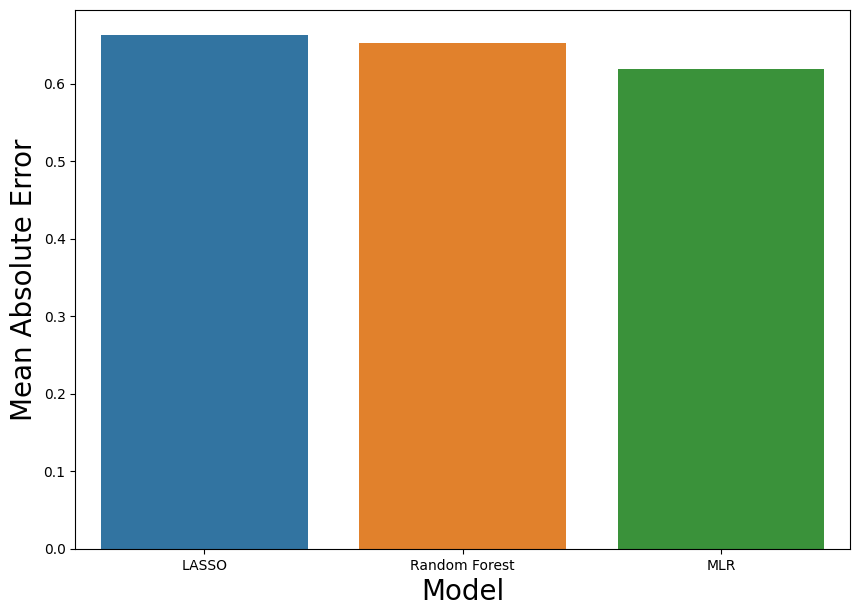

In [80]:

mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()